

## Diseño de software para cómputo cientı́fico

_22–Diciembre–2021_

- Clemente José Antonio
- Ferreira Juan David
- San Martin Victor



__Date__: Dic 07, 2021 __Version__: 0.0.18alpha<br>
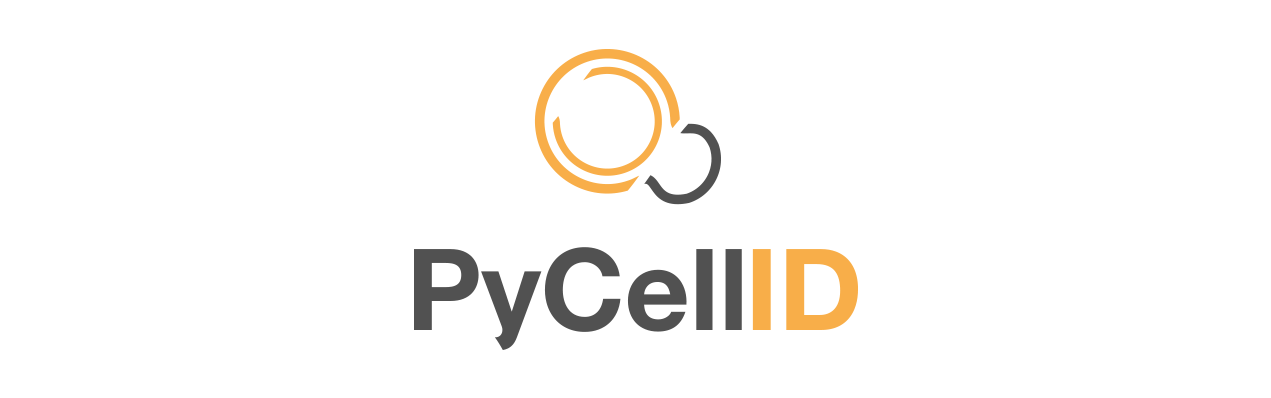
### PyCellID: Paquete para analizar datos de citometrı́a basado en microscopía.



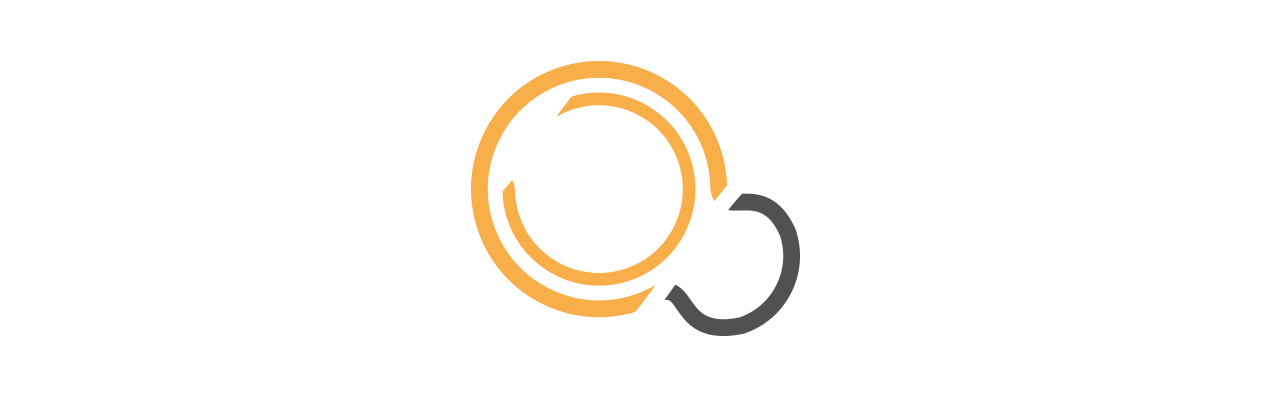

+ Introducción a la problemática científica.
+ Motivación.
+ Estructuda del paquete.
+ Documentación e integración contínua.
+ Futuras varsiones.

## Introducción
__El Problema científico__
+ Biología celular, biología molecular, biología de sistemas y microscopía.

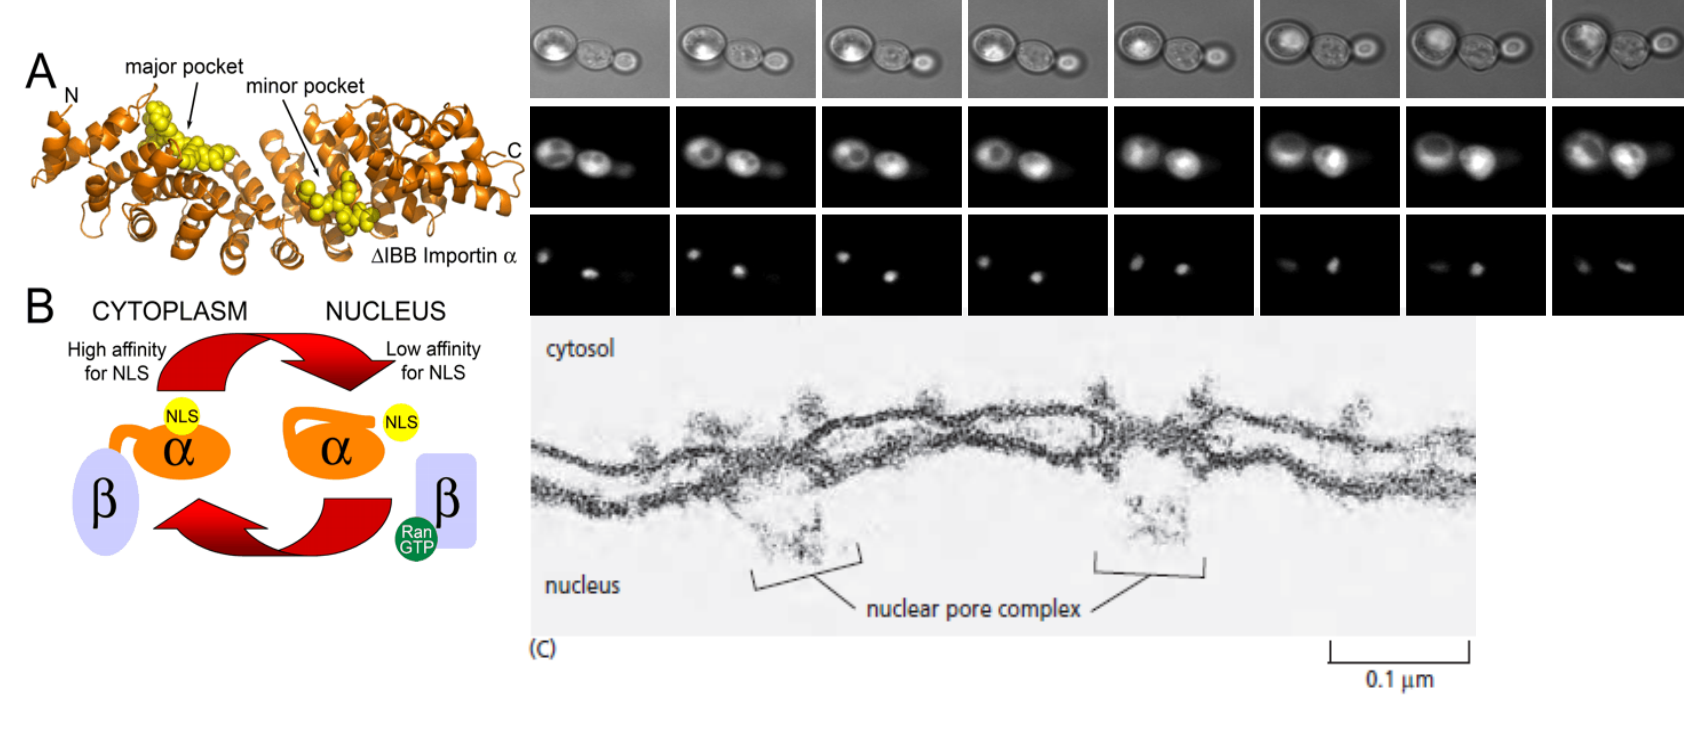

La biología de sistemas estudia el mecanismo por el cuál una *__señal__* produce una *__respuesta__*

Repetto et al. (2018). Molecular Cell.
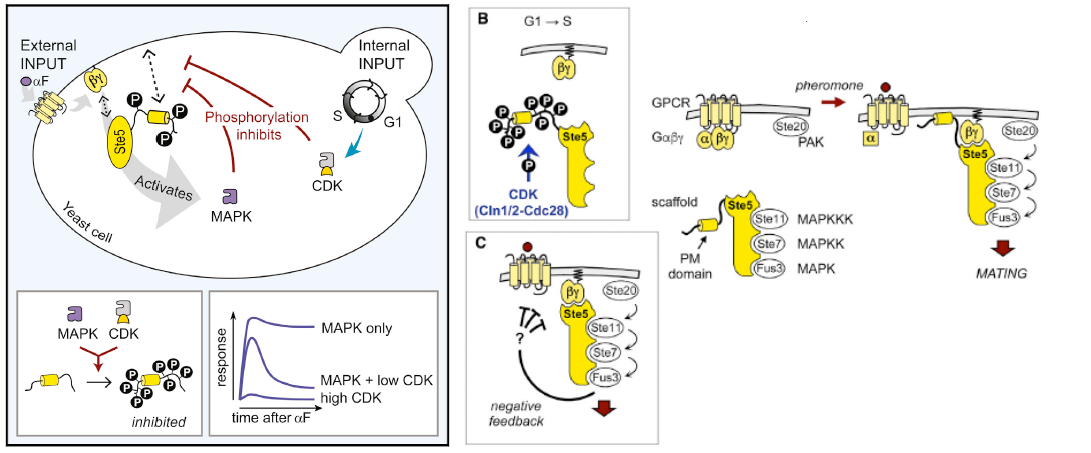

Citrometría de flujo vs. microscpía.

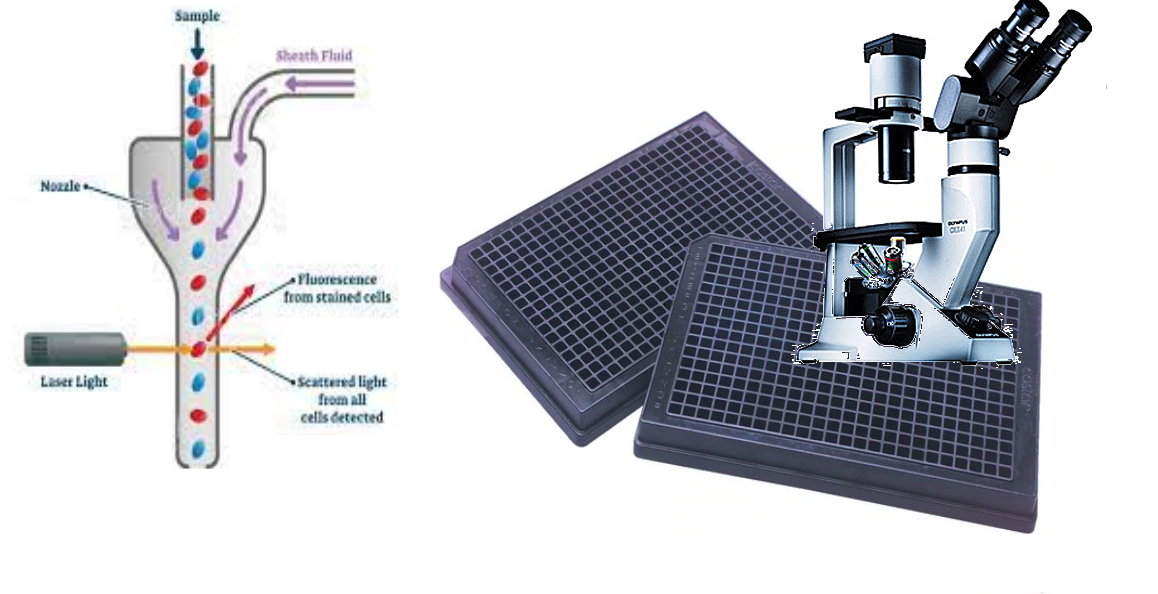

## Motivación

__CellID  VcellID  rcell  rcell2__

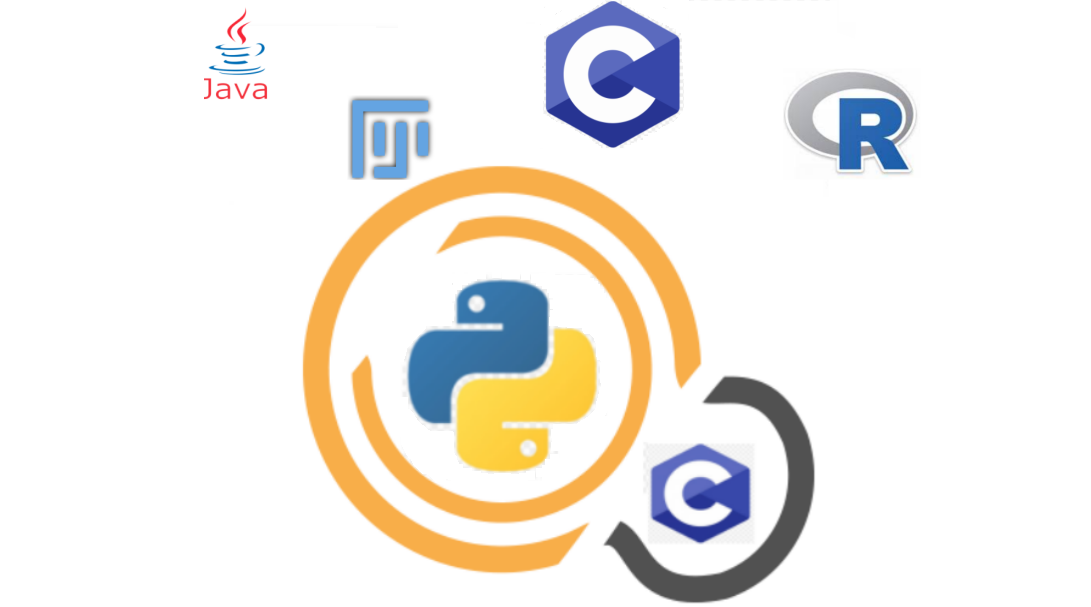



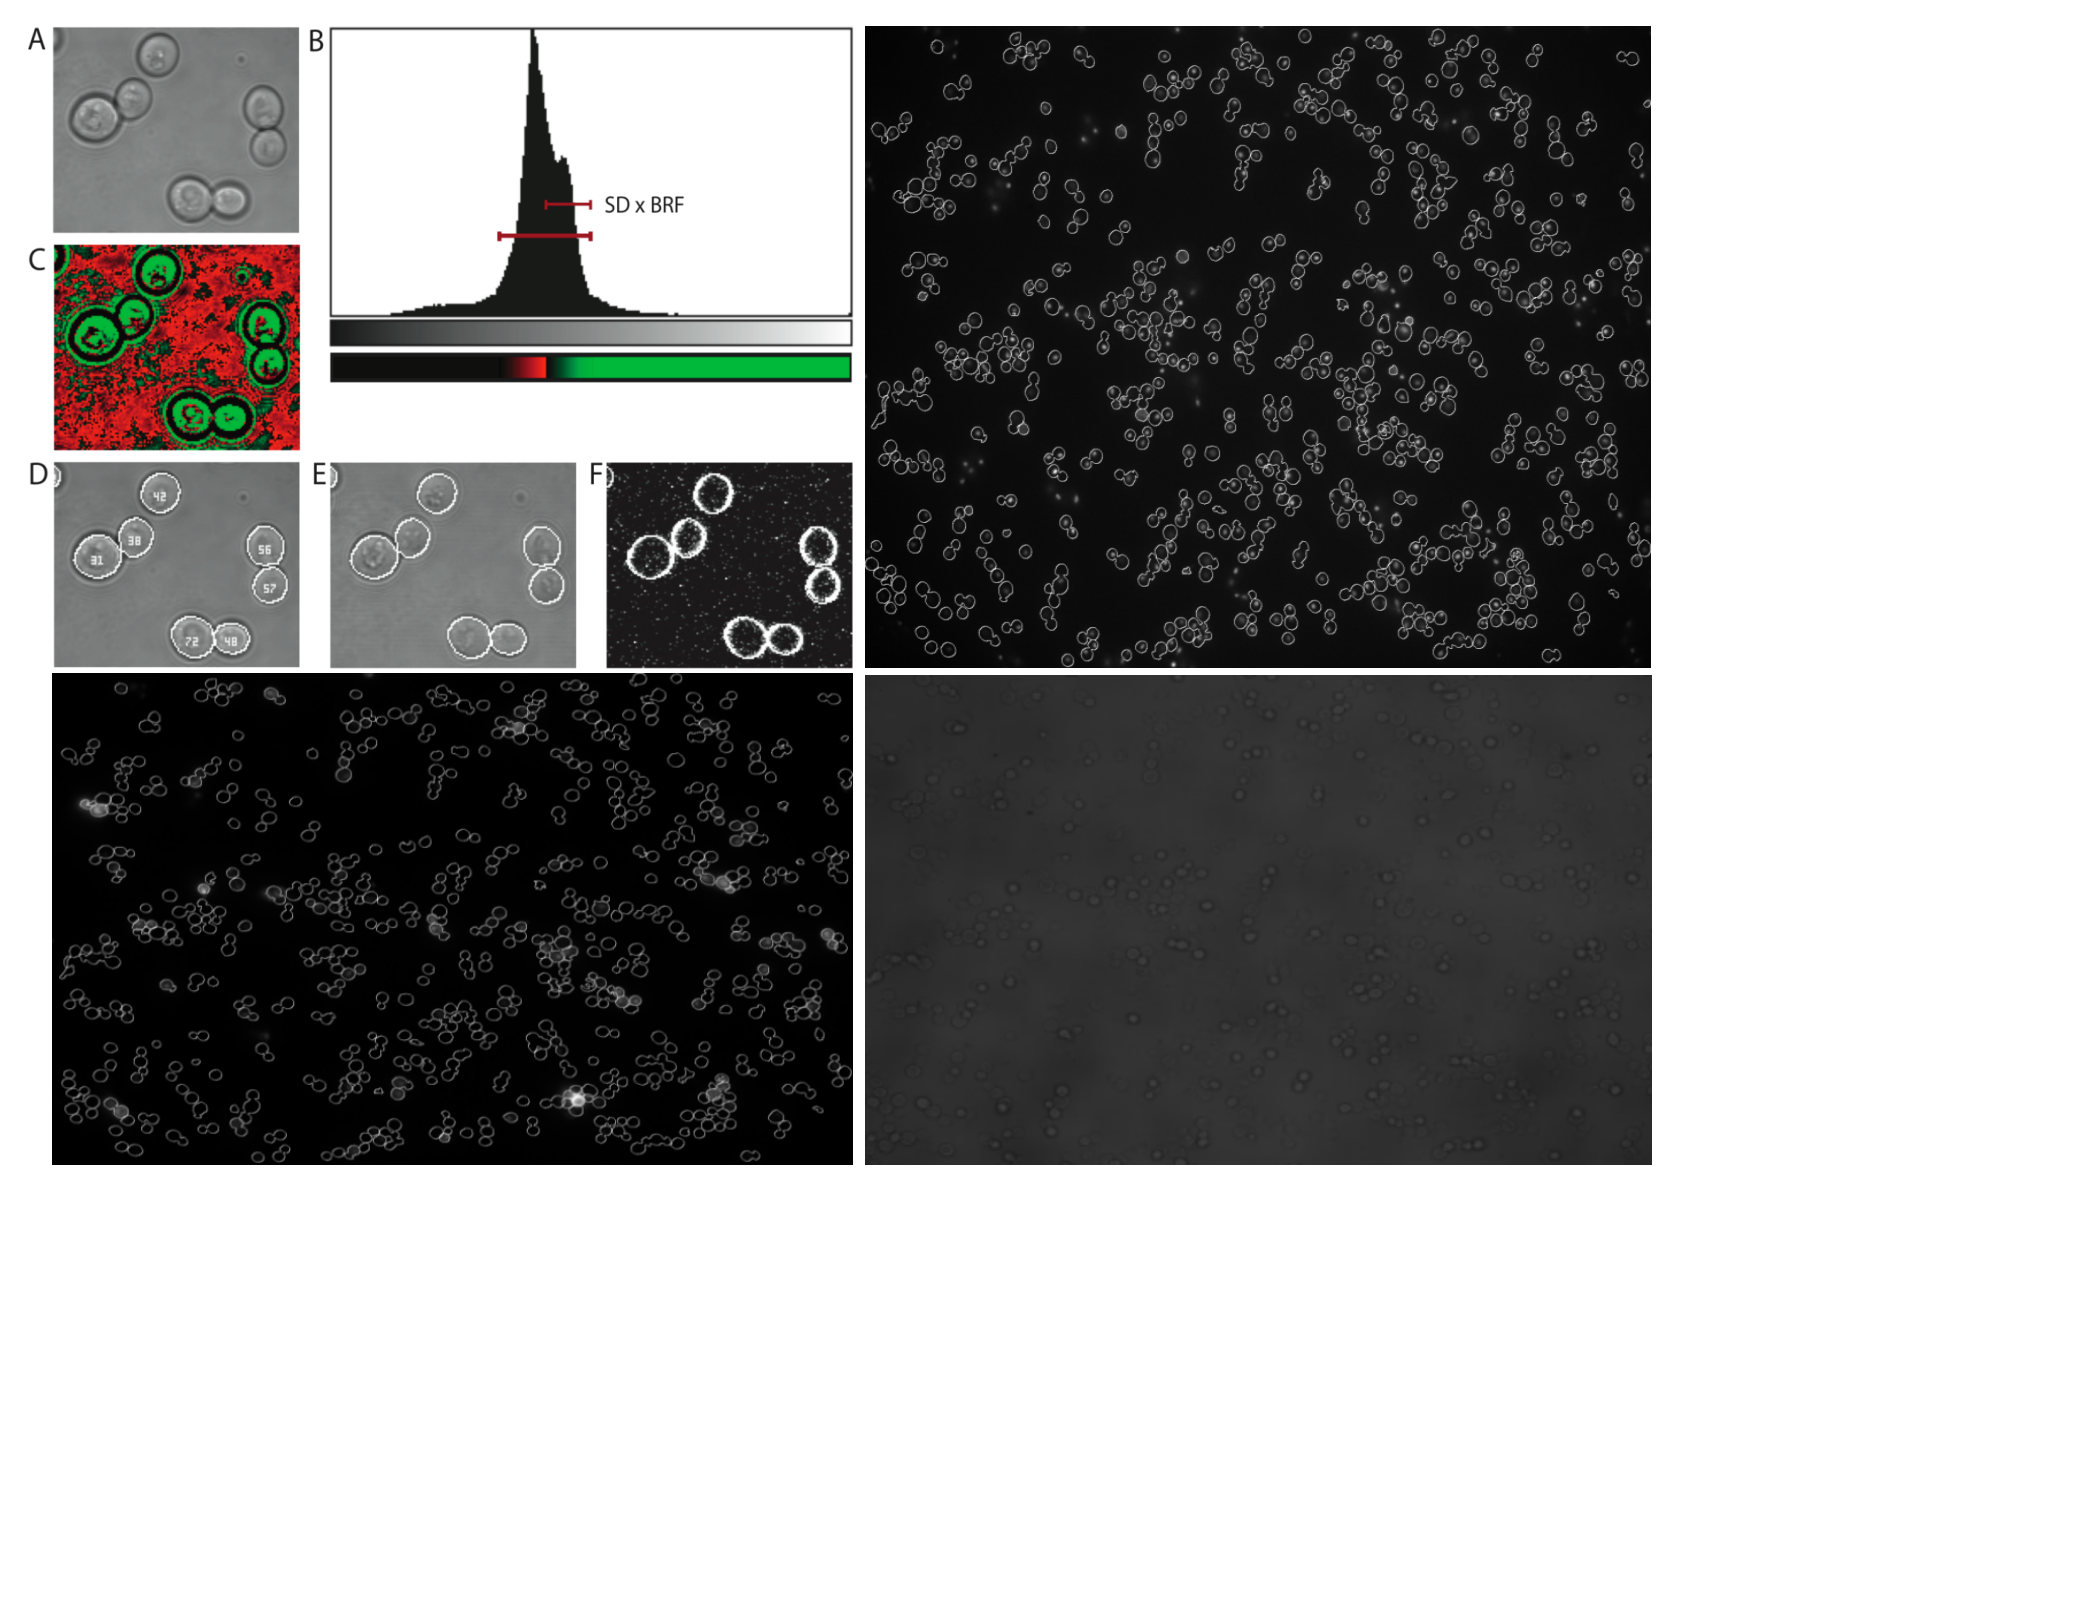

CellID out-put
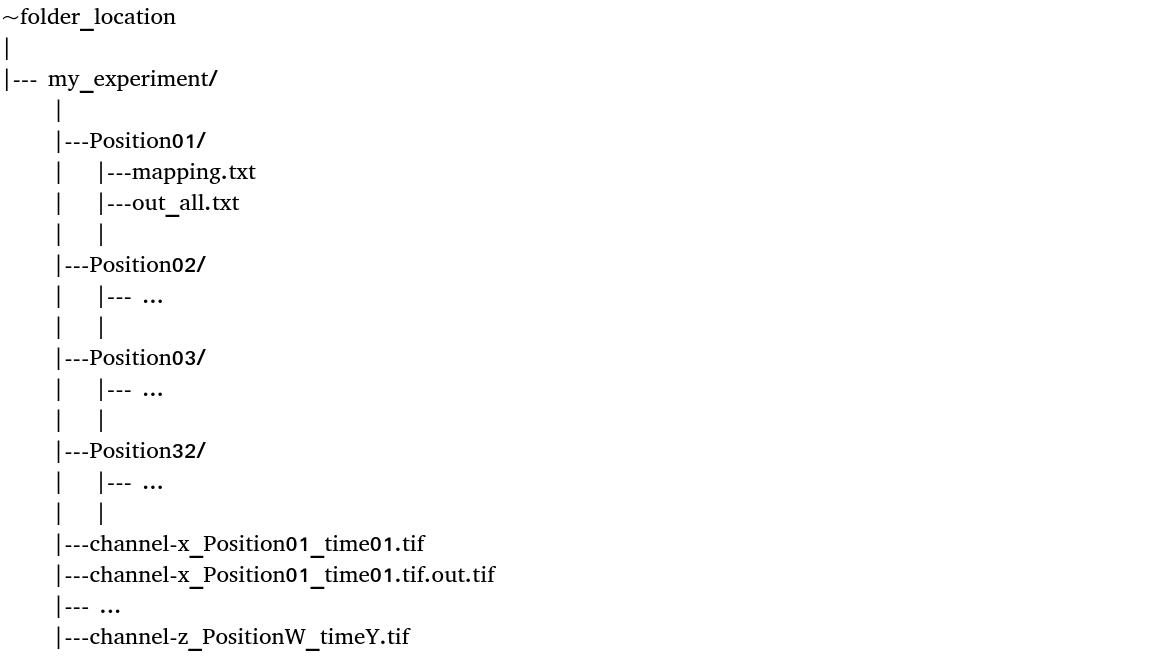

## Cell-ID junto a PyCellID proveen 5 categorías de variables:

1. __General measurments:__ **pos**, **cellID**, ucid, t_frame, time, xpos, ypos, f_tot, a_tot, fft_stat, perim, maj_axis, min_axis, flag, rot_vol, con_vol, a_vacuole, f_bg

2. __To calculate membrane proximal fluorescence:__
f_tot_p1**_channels**, a_tot_p1, f_tot_m1**_channels**, a_tot_m1, f_tot_m2**_channels**, a_tot_m2, f_tot_m3**_channels**, a_tot_m3

3. __"nuclear image" type:__
f_nucl**_channels**, f_nucl1**_channels** to f_nucl6**_channels**, a_nucl1 to a_nucl6, f_nucl_tag1**_channels** to f_nucl_tag6**_channels**

4. __More background information:__
f_local_bg**_channels**, a_local_bg, a_local, f_local2_bg_channels, a_local2_bg, a_local2

5. __More volume measurments:__
a_surf, sphere_vol

## Estructura del paquete PycellID

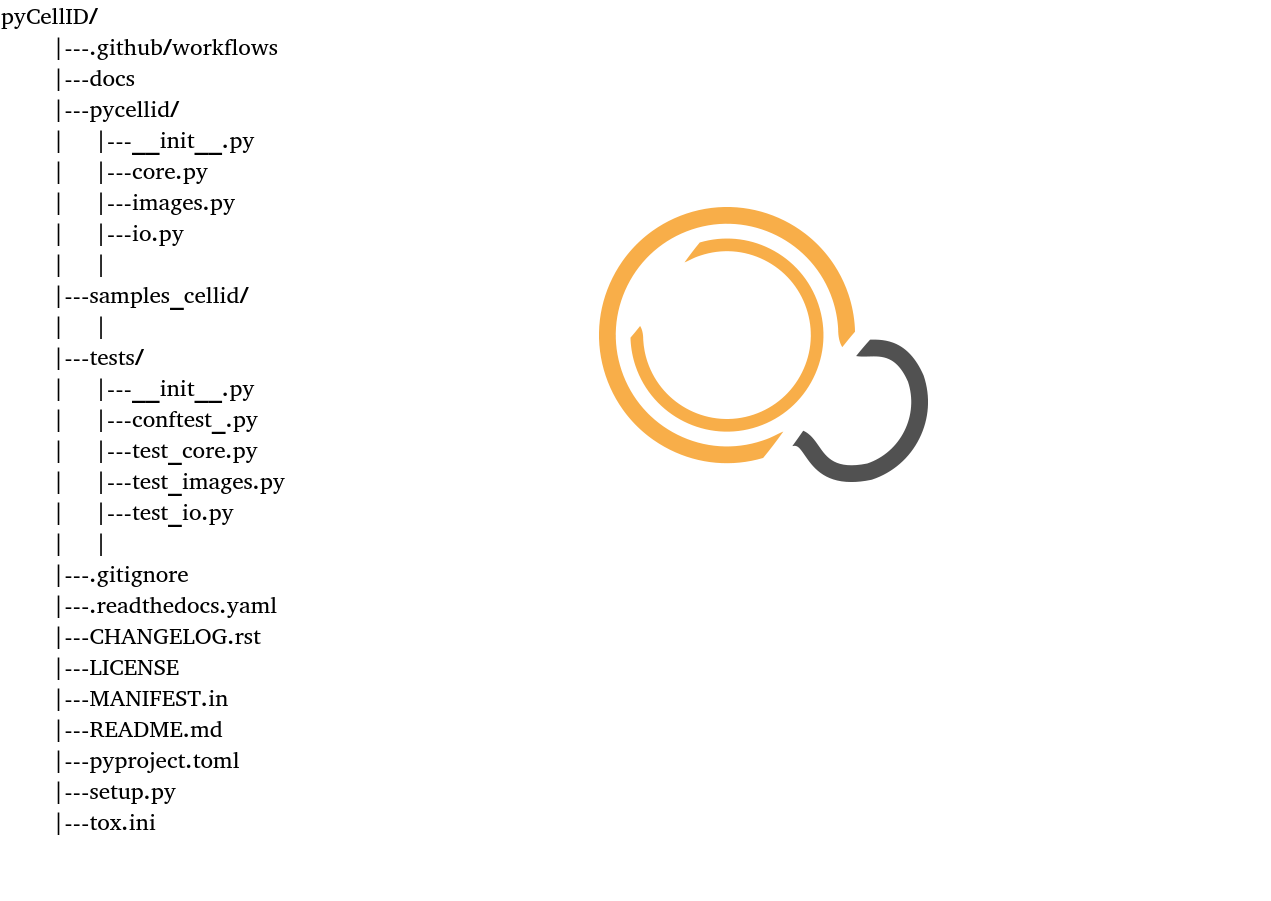

In [6]:
import os

import pycellid as ld

import pandas as pd
import matplotlib.pyplot as plt

base_dir = os.path.join(".","samples_cellid")
data_dir = os.path.join(base_dir,"pydata","df.csv")
data = pd.read_csv(data_dir)

## Instanciación del objeto CellData

+ declarando el directorio con las imágenes segmentadas y un Dataframe con las variables medidas.

In [7]:
base_dir = os.path.join(".","samples_cellid")
data_dir = os.path.join(base_dir,"pydata","df.csv")
data = pd.read_csv(data_dir)

# Instanciamos un objeto CellData
cells = ld.CellData(path=base_dir,df=data)

+ a través *.from_csv()*

In [8]:
cells = ld.CellData.from_csv(base_dir)

## Exploración y Filtrado de los datos
+ Gráficos exploratorios

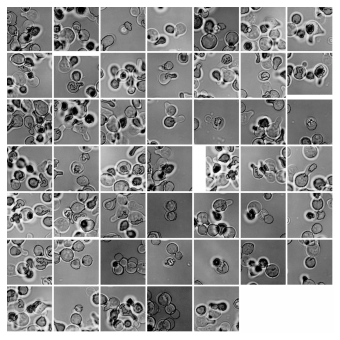

In [10]:
fig= plt.figure(figsize=(6, 6))
c = cells.plot(array_img_kws={"channel":"tfp", "n":47, "criteria":{"a_tot":[0, 700],"maj_axis":[10,20]}})

+ Histogramas y más...

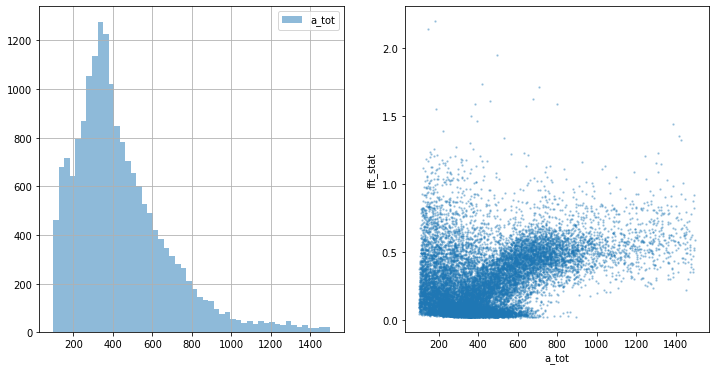

In [11]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(12, 6)

c1 = cells.a_tot.hist(bins=50, alpha=0.5, legend=True, ax=axs[0])
c2 = cells.plot.scatter(x="a_tot", y="fft_stat", s=2, alpha=.3, ax=axs[1])

## CellsPloter

In [12]:
# Defining the accessor
ploter = ld.CellsPloter(cells)

CellPloter definedos métodos útiles:
+ cells_image
+ cimages

+ cells_image

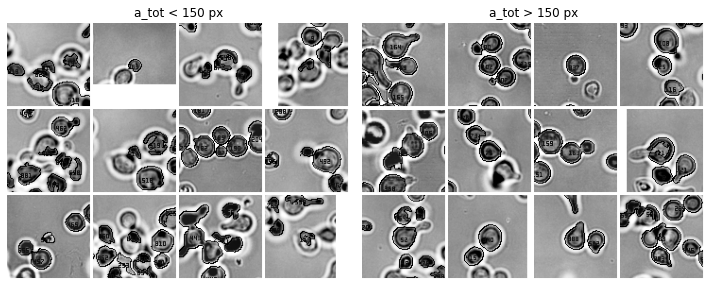

In [13]:
# initialize your figure
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(10, 8)

a_max = cells['a_tot'].max()

# Filtering your data
ploter.cells_image(array_img_kws={'n':12,'criteria':{'a_tot':[0.0,150]}},ax=axs[0])
ploter.cells_image(array_img_kws={'n':12,'criteria':{'a_tot':[150,a_max]}},ax=axs[1])

# titles
axs[0].set_title('a_tot < 150 px')
axs[1].set_title('a_tot > 150 px')

# customize your output
fig.tight_layout()

+ cimage

<AxesSubplot:>

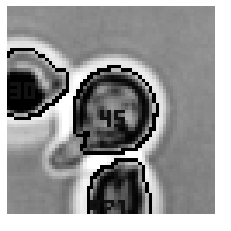

In [11]:
indentifier = { "channel":"BF", "ucid":100000000045, "t_frame":5}
box_img_kws = {"radius":30}
ploter.cimage( indentifier,box_img_kws = box_img_kws)

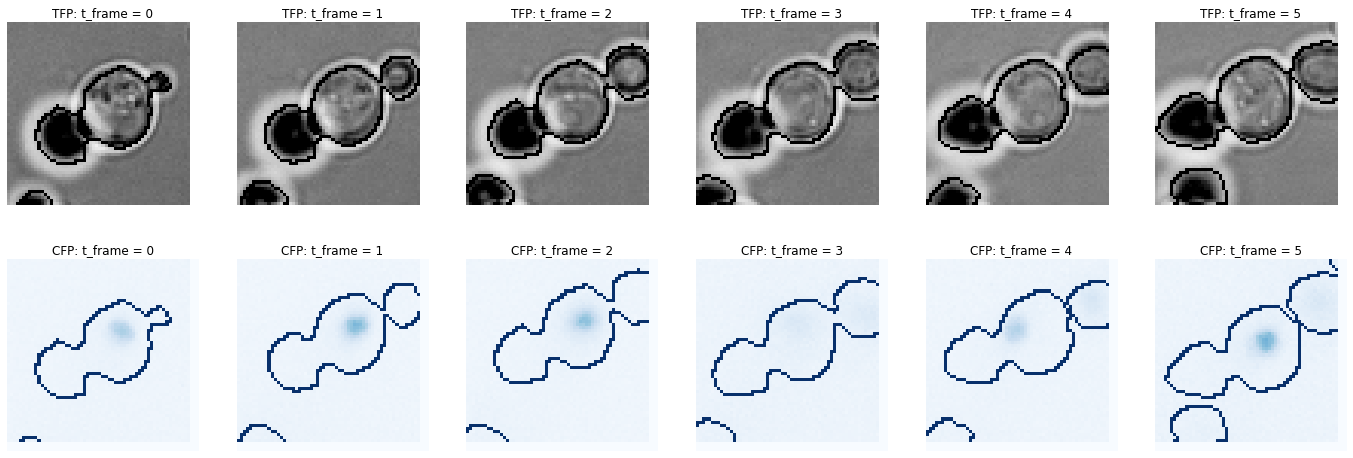

In [12]:
ucid = 100000000047
box_img_kws = {"radius":30}

# initialize your figure
fig, axs = plt.subplots(2, 6)
fig.set_size_inches(24, 8)

channels = ["TFP", "CFP"]
cmaps = ["Greys", "Blues"]

for j, c in enumerate(channels):
    imshow_kws = None
    imshow_kws = {"cmap": cmaps[j]}
    for i in range(6):
        indentifier = { "channel":c, "ucid":ucid, "t_frame":i}
        ploter.cimage( indentifier, box_img_kws = box_img_kws, imshow_kws=imshow_kws, ax=axs[j,i])
        titles = f'{c}: t_frame = {i}'
        axs[j,i].set_title(titles)

# Documentación:

La documentación está alojada en un servidor de documentación de código abierto, disponible en 

- https://readthedocs.org/projects/pycellid/

Para construirla utilizamos el archivo de configuración llamado `.readthedocs.yaml` situada en la raíz del proyecto.

Observación:

- La documentación, sigue el estilo de numpy.

# Tipos de testing

### Testing de la API:

Para testear la librería utitilamos Pytest Framework combinado la test suite of Matplotlib 
```
PyCellID
  |--tests/
      |-- pydata/
      |-- conftest.py
      |-- test_core.py
      |-- test_images.py
      |-- test_io.py
```
Dentro de la carpeta tests/ se encuentran los test de cada módulo, junto con las confiuguraciones iniciales que requieren/facilitan los tests de cada uno de estos.

### criterio de calidad de software

Para evaluar la métrica del coverage del código de nuestra librería, a través de los tests, utilizamos el servicio brindado por codecov:

- https://about.codecov.io/

## Subir el proyecto a test PyPI

Utilizamos un servidor de pruebas de librerías de Python:

- https://test.pypi.org/

El tutorial, basicamente explica que debemos correr comandos análogos a los cuales se ponen en producción una Librería en PyPI:
```console
python3 -m pip install --upgrade pip
python3 -m pip install --upgrade build
python3 -m build
```
Esteo genera dos archivos en el directorio `dist`:
```console
dist/
  pycellid-0.0.1-py3-none-any.whl
  pycellid-0.0.1.tar.gz
```

Intalamos `twine`, que es un Librería que brinda una `CLI`, la que permite conectarnos directamente con el servidor de TesPyPI. Ahora lo subimos
```
python3 -m pip install --upgrade twine
python3 -m twine upload --repository testpypi dist/*

Uploading distributions to https://test.pypi.org/legacy/
Enter your username: my-username
Enter your password:
Uploading pycellid-0.0.1-py3-none-any.whl
100%|█████████████████████| 4.65k/4.65k [00:01<00:00, 2.88kB/s]
Uploading pycellid-0.0.1.tar.gz
100%|█████████████████████| 4.25k/4.25k [00:01<00:00, 3.05kB/s]
```

## Instalando su paquete de prueba recién cargado

Corremos el siguiente comando:

```
python3 -m pip install --index-url https://test.pypi.org/simple/ --no-deps pycellid
```
Notar que `--no-deps` es una bandera que indica que no baja las dependecias del proyecto.
Hay que instalar manunualmente (matplotlib, atrrs y pandas) ya que se tratat de un sevidor de testing, que no suenta con la distribución de estos paquetes.


Obtenemos el mismo resultado corriendo el comando:

```
pip install -i https://test.pypi.org/simple/ pycellid
```

# Subir el proyecto a PyPI

Para publicar la librería en PyPI utilizamos GH-Actions a través de la configuración dispuesta en el documento `pyCellID/.github/workflows/python-publish.yml`, que se acciona cada vez que se crea un release en en repositorio.


# Para contrubir con el proyecto

Para cerrar, dejamos los comandos que permiten contrubir en el desarrollo dek proyecto

```
    $ git clone git@github.com:pyCellID/pyCellID.git
    $ cd pyCellID
    $ python3 -m venv venv
    $ source venv/bin/activate
    $ pip install -e .
    $ pip install -r requirements/dev.txt
```

Notar que el repositorio cuenta con una carpeta llamada `requirements`, a partir del cual podemos observar cada uno de los requeimientos de desarrollo.

La idea de esto fue faculitar la intalación para el desarrollo de contribuciones de otros científicos/desarrolladores.

Para correr los tests, ejecutamos

```
$ pytest -v tests/
```

Para pruebas automatizadas de integración, corremos:

```
$ tox -r
```

__Futuras versiones__

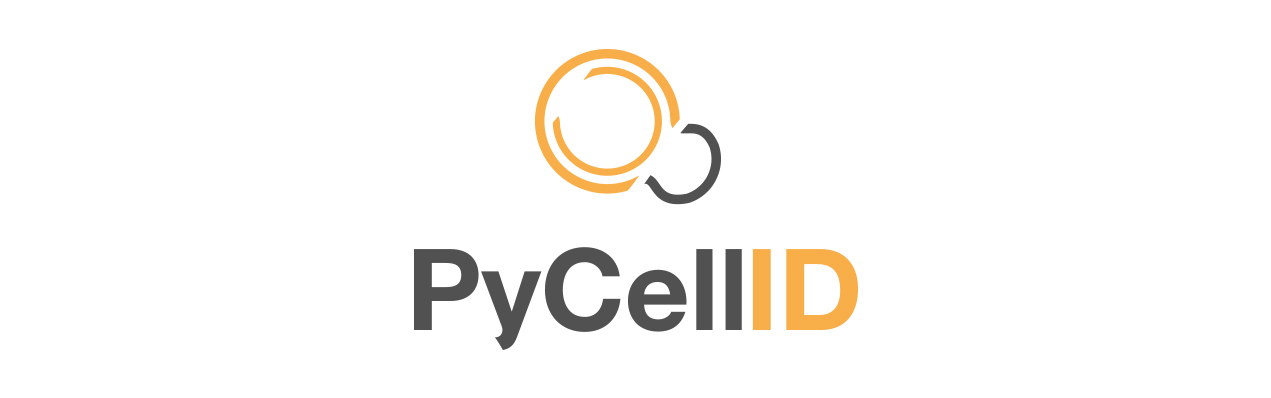

+ UX
+ CI
+ Pipeline
+ neural network

# Muchas gracias!!!!

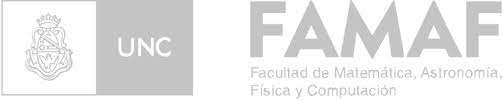



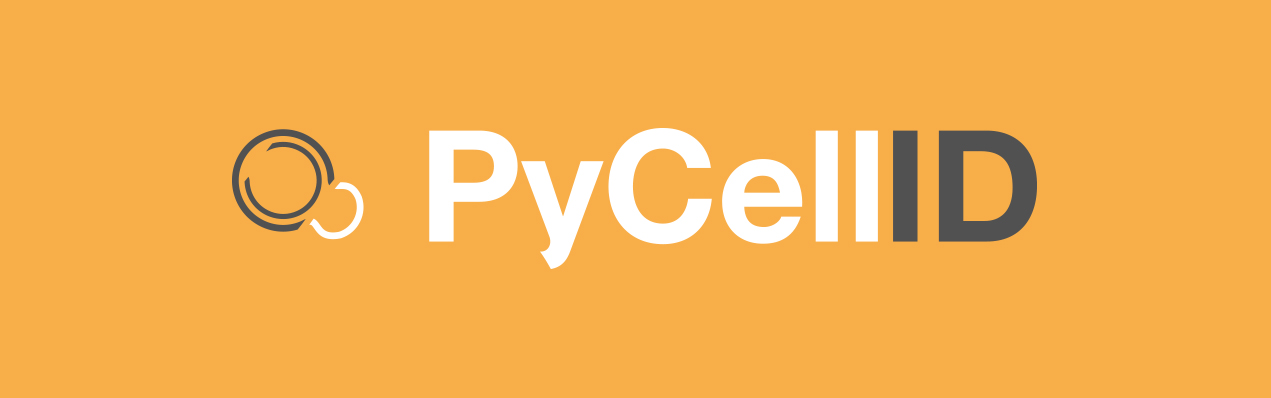